In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, LayerNormalization, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

In [2]:
epochs = 50


In [3]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), 
                 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255) 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    zoom_range=0.2,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                 validation_split=0.20)
training_set = train_datagen.flow_from_directory('traning_set\\',
                                                target_size = (227,227),
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                color_mode="rgb",
                                                subset='training',
                                                shuffle=True,
                                                seed=42)
valid_set = train_datagen.flow_from_directory('traning_set\\',
                                                target_size=(227,227),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='validation',
                                                shuffle=True,
                                                seed=42)


test_set = test_datagen.flow_from_directory('test_set\\',
                                                target_size = (227,227),
                                                batch_size = 1,
                                                color_mode="rgb",
                                                shuffle=False,
                                                class_mode = None,
                                                seed=42)


Found 1737 images belonging to 2 classes.
Found 434 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [17]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics = ['accuracy'])

from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_modelA_2.h5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', save_freq="epoch")
checkpoint1 = ModelCheckpoint("best_modelL_2.h5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='min', save_freq="epoch")

history = model.fit(training_set,epochs = 50,validation_data = valid_set, callbacks = [checkpoint,checkpoint1])

Epoch 1/50
55/55 [==============================] - 430s 8s/step - loss: 1.1787 - accuracy: 0.6333 - val_loss: 1.1475 - val_accuracy: 0.5922

Epoch 00001: val_accuracy improved from -inf to 0.59217, saving model to best_modelA_2.h5

Epoch 00001: val_loss improved from inf to 1.14753, saving model to best_modelL_2.h5
Epoch 2/50
55/55 [==============================] - 454s 8s/step - loss: 0.8079 - accuracy: 0.6586 - val_loss: 1.0268 - val_accuracy: 0.6083

Epoch 00002: val_accuracy improved from 0.59217 to 0.60829, saving model to best_modelA_2.h5

Epoch 00002: val_loss improved from 1.14753 to 1.02678, saving model to best_modelL_2.h5
Epoch 3/50
55/55 [==============================] - 432s 8s/step - loss: 0.6861 - accuracy: 0.6874 - val_loss: 0.7797 - val_accuracy: 0.6567

Epoch 00003: val_accuracy improved from 0.60829 to 0.65668, saving model to best_modelA_2.h5

Epoch 00003: val_loss improved from 1.02678 to 0.77971, saving model to best_modelL_2.h5
Epoch 4/50
55/55 [==============

In [ ]:
new_model.save_weights("best_weightA_2.h5")


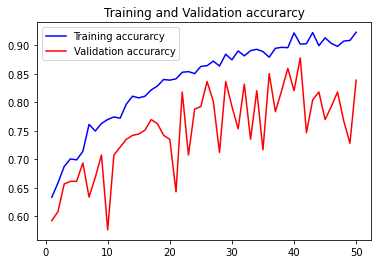

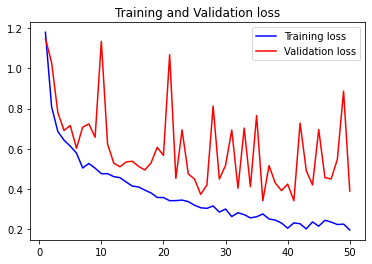

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [21]:
from keras.models import load_model
new_model = load_model('best_modelA_2.h5')
new_model.evaluate(valid_set)

14/14 [==============================] - 34s 2s/step - loss: 0.4190 - accuracy: 0.8456


[0.41900548338890076, 0.8456221222877502]